In [1]:
string = "{name:'兰州',geoCoord:[223.45,343.55]},"

In [2]:
import re

In [3]:
pattern = r"name:'\w+'"
# 前面r代表正则表达式，

In [4]:
re.findall(pattern,string)
# 把所有满足pattern的字符串找出来

["name:'兰州'"]

In [5]:
# ()内是要提取的内容
# + 1或多 ，* 0或多 ，？ 0或1
# []前要转义
pattern1 = r"name:'(\w+)',\s*geoCoord:\[(\d+.\d+),\s*(\d+.\d+)\]"
re.findall(pattern1,string)

[('兰州', '223.45', '343.55')]

In [6]:
pattern2 = re.compile(r"name:'(\w+)',\s*geoCoord:\[(\d+.\d+),\s*(\d+.\d+)\]")

In [7]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [8]:
city_location = {}
for line in coordination_source.split('\n'):
#     print(line)
    city_info = pattern2.findall(line)
#     pattern.findall 返回匹配的字符串组成的元组的字符串
#     print(city_info)
    if not city_info:
        continue
#         还会有找不到的情况？
    city,long,lat = city_info[0]
    long,lat = float(long),float(lat)
    city_location[city] = (long,lat)

In [9]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [10]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [11]:
def get_geo_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

In [12]:
get_geo_distance('香港','上海')

933.9310389667804

In [13]:
import networkx as nx
# 专门做图算法的包

In [14]:
city_graph = nx.Graph()
# 建图

In [15]:
city_graph.add_nodes_from(city_location.keys())

In [16]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

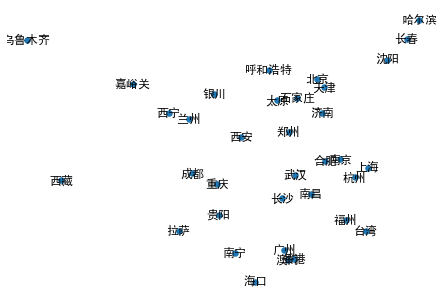

In [19]:
nx.draw(city_graph,city_location,with_labels=True,node_size=30)

In [62]:
threshold = 300

In [63]:
city_connection = defaultdict(list)

In [64]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1,c2)
        
        if distance <= threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [65]:
city_connection

defaultdict(list,
            {'兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],
             '北京': ['石家庄', '济南', '石家庄', '济南', '天津', '天津'],
             '贵阳': ['重庆', '南宁', '重庆', '南宁'],
             '南宁': ['贵阳', '海口', '贵阳', '海口'],
             '武汉': ['郑州', '南昌', '长沙', '郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥', '武汉', '合肥'],
             '长沙': ['武汉',
              '郑州',
              '广州',
              '武汉',
              '郑州',
              '广州',


In [67]:
city_with_road = nx.Graph(city_connection)

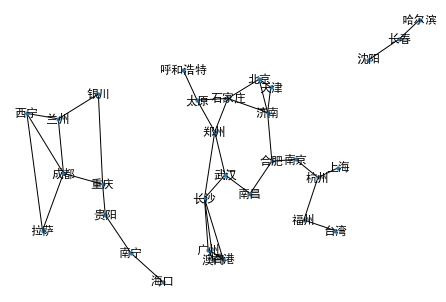

In [68]:
nx.draw(city_with_road,city_location,with_labels=True,node_size=10)

In [20]:
simple_connection_info = {
    '北京':{'太原'},
    '太原':{'北京','西安','郑州'},
    '兰州':{'西安'},
    '西安':{'兰州','长沙','太原'},
    '长沙':{'福州','南宁','西安'},
    '郑州':{'太原'},
    '福州':{'长沙'},
    '南宁':{'长沙'}
}

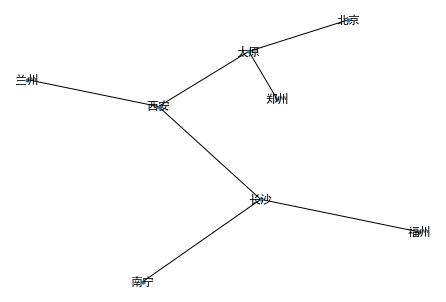

In [21]:
nx.draw(nx.Graph(simple_connection_info),city_location,with_labels=True,node_size=10)

In [93]:
"""
广度优先
"""
def search(start,destination,connection_graph,sort_candidate):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
            
        successors = connection_graph[frontier]  

        for city in successors:
            if city in visited:continue
            new_path = path + [city]
            print(new_path)
            pathes.append(new_path)
            if city == destination: return new_path
#             输出 最先到达终点的那条路，即最近路线
        visited.add(frontier)  
        pathes = sort_candidate(pathes)

In [82]:
def transfer_station_first(pathes):
#     最少换乘
    return sorted(pathes,key=len)

In [91]:
def shortest_path_first(pathes):
#     最短距离
    if distance <= 1: return pathes
    def get_path_distance(path):
        distance = 0
        for station in path[:-1]:
#             ?
            distance += get_geo_distance(station,path[-1])
            
        return distance
    return sorted(pathes,key=get_path_distance)

In [89]:
def transfer_as_much_possible(pathes):
#     未实现功能
    return sorted(pathes,key=len,reverse=True)

In [90]:
search('北京','南昌',city_connection,sort_candidate=transfer_as_much_possible)

['北京', '石家庄']
['北京', '济南']
['北京', '石家庄']
['北京', '济南']
['北京', '天津']
['北京', '天津']
['北京', '石家庄', '郑州']
['北京', '石家庄', '济南']
['北京', '石家庄', '太原']
['北京', '石家庄', '郑州']
['北京', '石家庄', '济南']
['北京', '石家庄', '太原']
['北京', '济南', '合肥']
['北京', '济南', '天津']
['北京', '济南', '合肥']
['北京', '济南', '天津']
['北京', '石家庄', '郑州', '武汉']
['北京', '石家庄', '郑州', '武汉']
['北京', '石家庄', '郑州', '长沙']
['北京', '石家庄', '郑州', '太原']
['北京', '石家庄', '郑州', '长沙']
['北京', '石家庄', '郑州', '太原']
['北京', '石家庄', '太原', '呼和浩特']
['北京', '石家庄', '太原', '呼和浩特']
['北京', '济南', '合肥', '南京']
['北京', '济南', '合肥', '南京']
['北京', '济南', '合肥', '南昌']


['北京', '济南', '合肥', '南昌']

In [94]:
search('北京','南昌',city_connection,sort_candidate=shortest_path_first)

['北京', '石家庄']
['北京', '济南']
['北京', '石家庄']
['北京', '济南']
['北京', '天津']
['北京', '天津']
['北京', '天津', '济南']
['北京', '天津', '济南']
['北京', '济南', '石家庄']
['北京', '济南', '石家庄']
['北京', '济南', '合肥']
['北京', '济南', '合肥']
['北京', '石家庄', '郑州']
['北京', '石家庄', '太原']
['北京', '石家庄', '郑州']
['北京', '石家庄', '太原']
['北京', '石家庄', '郑州', '武汉']
['北京', '石家庄', '郑州', '武汉']
['北京', '石家庄', '郑州', '长沙']
['北京', '石家庄', '郑州', '太原']
['北京', '石家庄', '郑州', '长沙']
['北京', '石家庄', '郑州', '太原']
['北京', '济南', '合肥', '南京']
['北京', '济南', '合肥', '南京']
['北京', '济南', '合肥', '南昌']


['北京', '济南', '合肥', '南昌']

In [74]:
search('北京','长沙',city_with_road,sort_candidate=lambda n:n)

['北京', '石家庄']
['北京', '济南']
['北京', '天津']
['北京', '石家庄', '郑州']
['北京', '石家庄', '济南']
['北京', '石家庄', '太原']
['北京', '济南', '合肥']
['北京', '济南', '天津']
['北京', '石家庄', '郑州', '武汉']
['北京', '石家庄', '郑州', '长沙']


['北京', '石家庄', '郑州', '长沙']

In [23]:
"""
深度优先
"""
def depth_first(start,destination,connection_graph):
    visited = set()
    path = [[start]]
    
    while path:
        frontier = path.pop(0)
        
    if frontier in visited: continue
    successors = connection_graph[frontier]
    for city in successors:
        
    while pathes:
        

SyntaxError: invalid syntax (<ipython-input-23-c9ae7b6fab83>, line 4)

In [ ]:
search('北京','福州',simple_connection_info)

In [24]:
from collections import defaultdict
# 引入默认字典，当key不存在时不会报错，返回空列表

In [59]:
def bfs(graph,start):
    '''
    breath first search                 
    '''
    visited = [start]
    seen = set()
    front=[]
    while visited:
        frontier = visited.pop()
#         print(frontier)
        front.append(frontier)
        if frontier in seen: continue
            
        for successor in graph[frontier]:
            if successor in seen:continue
#             print(successor)
            visited.append(successor)
#           visited = visited + successor
#     每次扩展先遍历最新点
            print('visited:',visited)
            
        seen.add(frontier)
     
    print(front)
    return seen

In [37]:
number_graph = defaultdict(list)
number_graph.update({
    1:[2,3],
    2:[1,4],
    3:[1,5],
    4:[2,6],
    5:[3,7]
})

In [34]:
bfs(simple_connection_info,'北京')

太原
西安
郑州
长沙
兰州
福州
南宁


{'兰州', '北京', '南宁', '太原', '福州', '西安', '郑州', '长沙'}

In [49]:
bfs(number_graph,1)

1
visited: [2]
visited: [2, 3]
3
visited: [2, 5]
5
visited: [2, 7]
7
2
visited: [4]
4
visited: [6]
6


{1, 2, 3, 4, 5, 6, 7}

In [55]:
def bfs_(graph,start):
    '''
    breath first search                 
    '''
    visited = [start]
    post = []
    seen = set()
    while visited:
        frontier = visited.pop()
        print(frontier)
        post.append(frontier)
        if frontier in seen: continue
            
        for successor in graph[frontier]:
            if successor in seen:continue
            visited = [successor] + visited
#             每次扩展先遍历已经发现的点
            print('viaited:',visited)
        
        seen.add(frontier)
    
    print(post)
    return seen

In [56]:
bfs_(number_graph,1)

1
viaited: [2]
viaited: [3, 2]
2
viaited: [4, 3]
3
viaited: [5, 4]
4
viaited: [6, 5]
5
viaited: [7, 6]
6
7
[1, 2, 3, 4, 5, 6, 7]


{1, 2, 3, 4, 5, 6, 7}

In [57]:
bitree = defaultdict(list)
bitree.update({
    1:[2,3],
    2:[1,4,5],
    3:[1,6,7],
    4:[2,8,9],
    5:[2,10,11],
    6:[3,12]
})

In [60]:
bfs(bitree,1)

visited: [2]
visited: [2, 3]
visited: [2, 6]
visited: [2, 6, 7]
visited: [2, 12]
visited: [4]
visited: [4, 5]
visited: [4, 10]
visited: [4, 10, 11]
visited: [8]
visited: [8, 9]
[1, 3, 7, 6, 12, 2, 5, 11, 10, 4, 9, 8]


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [61]:
bfs_(bitree,1)

1
viaited: [2]
viaited: [3, 2]
2
viaited: [4, 3]
viaited: [5, 4, 3]
3
viaited: [6, 5, 4]
viaited: [7, 6, 5, 4]
4
viaited: [8, 7, 6, 5]
viaited: [9, 8, 7, 6, 5]
5
viaited: [10, 9, 8, 7, 6]
viaited: [11, 10, 9, 8, 7, 6]
6
viaited: [12, 11, 10, 9, 8, 7]
7
8
9
10
11
12
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [96]:
import requests

In [97]:
url = 'https://movie.douban.com/subject/25779217/?from=showing'

In [103]:
response = requests.get(url)
# request 200  返回正确

In [127]:
pattern = re.compile(r'<a href="(https://movie\.douban\.com/subject/\d+/\?from=subject-page)" >')

In [129]:
likes = pattern.findall(response.text)

### 数据处理，根据信息构建图，封装爬虫函数